## Data Collection

In [1]:
import pandas as pd
data = pd.read_csv("ucl_stats.csv")
data

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


In [2]:
# View available columns and related info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            714 non-null    int64 
 1   team            714 non-null    object
 2   match_played    714 non-null    int64 
 3   wins            714 non-null    int64 
 4   draws           714 non-null    int64 
 5   losts           714 non-null    int64 
 6   goals_scored    714 non-null    int64 
 7   goals_conceded  714 non-null    int64 
 8   gd              714 non-null    int64 
 9   group_point     714 non-null    int64 
 10  champions       714 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 61.5+ KB


In [3]:
# Quick view of descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,714.0,2008.711485,7.340121,1993.0,2004.0,2009.0,2015.0,2020.0
match_played,714.0,7.673669,2.100880,6.0,6.0,6.0,8.0,13.0
wins,714.0,2.939776,2.316600,0.0,1.0,2.0,4.0,11.0
draws,714.0,1.844538,1.273169,0.0,1.0,2.0,3.0,7.0
losts,714.0,2.892157,1.234552,0.0,2.0,3.0,4.0,6.0
goals_scored,714.0,10.582633,6.979194,0.0,5.0,9.0,14.0,43.0
goals_conceded,714.0,10.443978,3.634080,2.0,8.0,10.0,13.0,24.0
gd,714.0,0.198880,7.573646,-22.0,-5.0,0.0,5.0,35.0
group_point,714.0,8.183473,4.192922,-8.0,5.0,8.0,11.0,18.0
champions,714.0,0.039216,0.194244,0.0,0.0,0.0,0.0,1.0


## Data Cleaning

In [4]:
# Check for missing values
data.isna().sum()  

year              0
team              0
match_played      0
wins              0
draws             0
losts             0
goals_scored      0
goals_conceded    0
gd                0
group_point       0
champions         0
dtype: int64

In [5]:
# Check for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicates: ", len(duplicates))

Number of duplicates:  0


In [6]:
# Function to handle any possible inconsistencies in our dataset
def fix_inconsistencies(data):
    # Check for and impute any negative goal values with a 0
    data['goals_scored'] = data['goals_scored'].where(data['goals_scored'] >= 0, 0)
    data['goals_conceded'] = data['goals_conceded'].where(data['goals_conceded'] >= 0, 0)
    
    # Ensure that matches played = wins + draws + losses
    data = data[data['wins'] + data['draws'] + data['losts'] == data['match_played']]
    
    # Check that Goal Diff = Goals For - Goals Against
    data = data[data['goals_scored'] - data['goals_conceded'] == data['gd']]
    
    return data

cleaned_df = fix_inconsistencies(data.copy()) # Using a copy of the original data set
cleaned_df

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


## Feature Engineering

At this stage, we renamed some features to further clarify what they represent. Unneccessary features are dropped from the dataset here as well. From the existing attributes, we also need to build new features in order to provide important metrics that might serve to improve our model's prerformance.

In [7]:
# Rename features
df = cleaned_df # Renamed for easier typing and more cleaner code
df = df.rename(columns={'match_played': 'matches_played', 'losts': 'losses', 'gd': 'goal_diff'})
df.head()

,year,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0


In [8]:
# Drop unnecessary features
df.drop(['year'], axis = 1, inplace = True)
df

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions
0,Marseille,6,3,3,0,14,4,10,9,1
1,Milan,7,6,0,1,11,2,9,12,0
2,Rangers,6,2,4,0,7,5,2,8,0
3,Club Brugge,6,2,1,3,5,8,-3,5,0
4,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...
709,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,Valencia,8,3,2,3,13,15,-2,11,0
711,Chelsea,8,3,2,3,12,16,-4,11,0
712,Ajax,6,3,1,2,12,6,6,10,0


In [9]:
# Encode team column
df['team'] = df['team'].astype('category').cat.codes

In [10]:
# Build new Ratio features
df['Win_Ratio'] = (df['wins'] + 1) / df['matches_played']
df['Loss_Ratio'] = (df['losses'] + 1) / df['matches_played']
df['GoalsScored_to_Matches'] = (df['goals_scored'] + 1) / df['matches_played']
df['GoalsConceeded_to_Matches'] = (df['goals_conceded'] + 1) / df['matches_played']
df['Win_to_Loss'] = (df['wins'] + 1) / (df['losses'] + 1)
df['Wins_to_GoalsScored'] = (df['wins'] + 1) / (df['goals_scored'] + 1) 
df['GoalsScored_GoalsConceded'] = (df['goals_scored'] - df['goals_conceded']) + 0.1

# df['GoalsScored_to_GoalDiff'] = df['Goals Scored'] / df['Goal Diff']
# df['GoalsConceeded_to_Matches'] = df['Goals Conceeded'] / df['Total Matches']
df

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions,Win_Ratio,Loss_Ratio,GoalsScored_to_Matches,GoalsConceeded_to_Matches,Win_to_Loss,Wins_to_GoalsScored,GoalsScored_GoalsConceded
0,87,6,3,3,0,14,4,10,9,1,0.666667,0.166667,2.500000,0.833333,4.000000,0.266667,10.1
1,88,7,6,0,1,11,2,9,12,0,1.000000,0.285714,1.714286,0.428571,3.500000,0.583333,9.1
2,106,6,2,4,0,7,5,2,8,0,0.500000,0.166667,1.333333,1.000000,3.000000,0.375000,2.1
3,43,6,2,1,3,5,8,-3,5,0,0.500000,0.666667,1.000000,1.500000,0.750000,0.500000,-2.9
4,38,6,0,2,4,2,11,-9,2,0,0.166667,0.833333,0.500000,2.000000,0.200000,0.333333,-8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,140,6,2,1,3,7,9,-2,7,0,0.500000,0.666667,1.333333,1.666667,0.750000,0.375000,-1.9
710,134,8,3,2,3,13,15,-2,11,0,0.500000,0.500000,1.750000,2.000000,1.000000,0.285714,-1.9
711,42,8,3,2,3,12,16,-4,11,0,0.500000,0.500000,1.625000,2.125000,1.000000,0.307692,-3.9
712,10,6,3,1,2,12,6,6,10,0,0.666667,0.500000,2.166667,1.166667,1.333333,0.307692,6.1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 0 to 713
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team                       685 non-null    int16  
 1   matches_played             685 non-null    int64  
 2   wins                       685 non-null    int64  
 3   draws                      685 non-null    int64  
 4   losses                     685 non-null    int64  
 5   goals_scored               685 non-null    int64  
 6   goals_conceded             685 non-null    int64  
 7   goal_diff                  685 non-null    int64  
 8   group_point                685 non-null    int64  
 9   champions                  685 non-null    int64  
 10  Win_Ratio                  685 non-null    float64
 11  Loss_Ratio                 685 non-null    float64
 12  GoalsScored_to_Matches     685 non-null    float64
 13  GoalsConceeded_to_Matches  685 non-null    float64
 14 

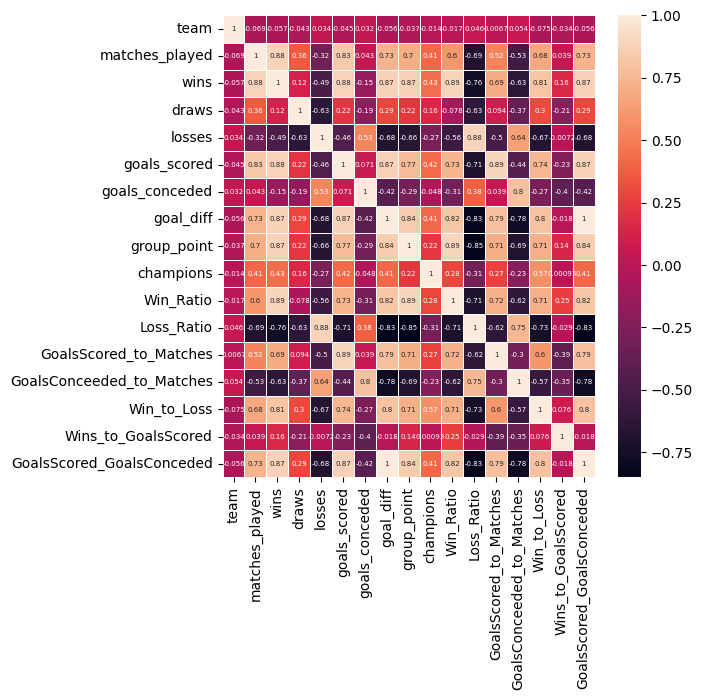

In [12]:
features = df.columns.tolist()
correlation = df[features].corr()

# Print the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation, annot=True, annot_kws={"size": 5}, linewidths=0.5)
plt.show()

In [13]:
# Performing Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ind_features = df.columns.drop("champions").tolist()
ind_features = df.drop("champions", axis=1).columns.tolist()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[ind_features]) 

In [14]:
pca = PCA(n_components=16)  # Choose the number of desired components
pca_features = pca.fit_transform(scaled_features)
pca_features

array([[ 3.98709968e+00,  1.14877128e+00,  1.73492468e+00, ...,
        -1.12694879e-15,  6.87104521e-16,  5.46002481e-16],
       [ 4.20696580e+00,  2.60479977e+00, -2.44978786e+00, ...,
         1.05801325e-15, -1.86228979e-16, -2.53837661e-16],
       [ 1.79341516e+00,  2.50622560e+00,  2.26406794e+00, ...,
         1.24487907e-14, -1.36136179e-15,  1.00339446e-16],
       ...,
       [-2.27931329e-01, -1.56258410e+00,  2.23159319e-01, ...,
         3.69086222e-17,  4.54696029e-18,  5.01604627e-18],
       [ 1.72429090e+00,  4.68810221e-01, -2.97365824e-01, ...,
        -2.15632860e-17, -1.06205194e-16,  5.85526236e-17],
       [-4.74442022e+00, -1.29450816e+00,  3.19741845e-01, ...,
        -3.87079906e-17, -1.12810805e-16,  7.90501475e-17]])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(pca_features, df['champions'], test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [17]:
from sklearn.metrics import precision_score, recall_score
correct_predictions = sum(y_pred == y_test)

# Calculate accuracy
accuracy = correct_predictions / len(y_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print correct predictions and accuracy
print("Correct Predictions:", correct_predictions)
print("Accuracy:", accuracy)

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)

Correct Predictions: 132
Accuracy: 0.9635036496350365
Precision: 0.75
Recall: 0.42857142857142855


In [18]:
# Print correct and incorrect predictions
for i in range(len(y_test)):
    if y_pred[i] == y_test.iloc[i]:
        print("Correct Prediction:", y_pred[i])
    else:
        print("Incorrect Prediction. Predicted:", y_pred[i], "Actual:", y_test.iloc[i])


Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Incorrect Prediction. Predicted: 0 Actual: 1
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Incorrect Prediction. Predicted: 1 Actual: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 1
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Incorrect Prediction. Predicted: 0 Actual: 1
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct

In [19]:
y_test

304    0
570    0
218    0
341    1
169    0
      ..
284    0
111    0
83     0
52     0
217    0
Name: champions, Length: 137, dtype: int64

In [20]:
real = pd.read_csv('real.csv')
real['Club'] = real['Club'].astype('category').cat.codes
real

,Club,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,7,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,4,39,6,382,229,76,77,804,373.0,534.0,431.0
2,3,33,5,339,197,76,66,667,343.0,470.0,324.0
3,0,21,0,201,101,43,57,332,218.0,245.0,114.0
4,1,21,1,170,81,33,56,287,214.0,195.0,73.0
5,2,18,0,160,76,42,42,226,152.0,194.0,74.0
6,6,16,0,143,77,27,39,283,166.0,181.0,117.0
7,5,13,1,119,66,24,29,245,131.0,156.0,114.0


In [21]:
real = real.rename(columns={'Participated': 'matches_played', 'Win': 'wins', 'Loss': 'losses', 'Goals For': 'goals_scored', 'Goals Against' : 'goals_conceded', 'Goal Diff': 'goal_diff'})
real.drop(['Titles', 'Pts'], axis = 1, inplace = True)
real.head()

,Club,matches_played,Played,wins,Draw,losses,goals_scored,goals_conceded,goal_diff
0,7,53,476,285,81,110,1047,521.0,526.0
1,4,39,382,229,76,77,804,373.0,431.0
2,3,33,339,197,76,66,667,343.0,324.0
3,0,21,201,101,43,57,332,218.0,114.0
4,1,21,170,81,33,56,287,214.0,73.0


In [22]:
real['Win_Ratio'] = (real['wins'] + 1) / real['matches_played']
real['Loss_Ratio'] = (real['losses'] + 1) / real['matches_played']
real['GoalsScored_to_Matches'] = (real['goals_scored'] + 1) / real['matches_played']
real['GoalsConceeded_to_Matches'] = (real['goals_conceded'] + 1) / real['matches_played']
real['Win_to_Loss'] = (real['wins'] + 1) / (real['losses'] + 1)
real['Wins_to_GoalsScored'] = (real['wins'] + 1) / (df['goals_scored'] + 1) 
real['GoalsScored_GoalsConceded'] = (real['goals_scored'] - real['goals_conceded']) + 0.1
real

,Club,matches_played,Played,wins,Draw,losses,goals_scored,goals_conceded,goal_diff,Win_Ratio,Loss_Ratio,GoalsScored_to_Matches,GoalsConceeded_to_Matches,Win_to_Loss,Wins_to_GoalsScored,GoalsScored_GoalsConceded
0,7,53,476,285,81,110,1047,521.0,526.0,5.396226,2.094340,19.773585,9.849057,2.576577,19.066667,526.1
1,4,39,382,229,76,77,804,373.0,431.0,5.897436,2.000000,20.641026,9.589744,2.948718,19.166667,431.1
2,3,33,339,197,76,66,667,343.0,324.0,6.000000,2.030303,20.242424,10.424242,2.955224,24.750000,324.1
3,0,21,201,101,43,57,332,218.0,114.0,4.857143,2.761905,15.857143,10.428571,1.758621,17.000000,114.1
4,1,21,170,81,33,56,287,214.0,73.0,3.904762,2.714286,13.714286,10.238095,1.438596,27.333333,73.1
5,2,18,160,76,42,42,226,152.0,74.0,4.277778,2.388889,12.611111,8.500000,1.790698,9.625000,74.1
6,6,16,143,77,27,39,283,166.0,117.0,4.875000,2.500000,17.750000,10.437500,1.950000,13.000000,117.1
7,5,13,119,66,24,29,245,131.0,114.0,5.153846,2.307692,18.923077,10.153846,2.233333,13.400000,114.1


In [23]:
# real = pd.read_csv('real.csv')

# Separate features and target variable
#y = data['target_variable']  # Target variable (e.g., 'champions')

# Preprocess the data (e.g., handle missing values, encode categorical variables)
# For simplicity, let's assume no preprocessing is needed

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(real)

# Make predictions
y_real_pred = model.predict(scaled_features)
y_real_pred

array([1, 1, 0, 0, 0, 0, 0, 0])